In [1]:
import geopandas as gpd
import shapely
from shapely.geometry import LineString, Point
%matplotlib inline

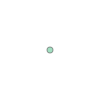

In [2]:
p = Point(2,3)
p

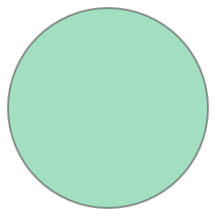

In [3]:
p.buffer(100)

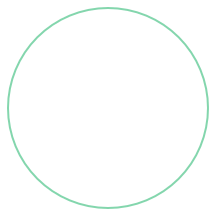

In [4]:
p.buffer(100).boundary

In [5]:
p.buffer(100).area

31365.48490545938

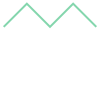

In [6]:
l = LineString([(0,0),(10,10),(20,0),(30,10),(40,0)])
l

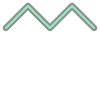

In [7]:
l.buffer(1)

In [8]:
p.to_wkt()

'POINT (2.0000000000000000 3.0000000000000000)'

In [9]:
df = gpd.GeoDataFrame(list(map(lambda x: [x.buffer(10).area, x.buffer(10)], [l,p])))

In [10]:
df.columns=["a","geometry"]

In [11]:
df.geometry

0    POLYGON ((2.928932188134525 17.07106781186548,...
1    POLYGON ((12 3, 11.95184726672197 2.0198285967...
Name: geometry, dtype: object

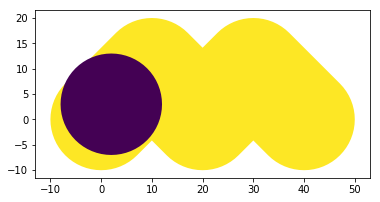

In [12]:
df.plot("a")

In [13]:
[x.to_wkt() for x in [l,p]]

['LINESTRING (0.0000000000000000 0.0000000000000000, 10.0000000000000000 10.0000000000000000, 20.0000000000000000 0.0000000000000000, 30.0000000000000000 10.0000000000000000, 40.0000000000000000 0.0000000000000000)',
 'POINT (2.0000000000000000 3.0000000000000000)']

In [14]:
df = gpd.GeoDataFrame([[l.buffer(x).area, l.buffer(x).boundary] for x in range(1,10)], 
                      columns=["a","geometry"])

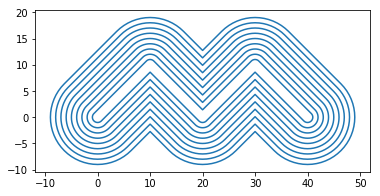

In [15]:
df.plot()

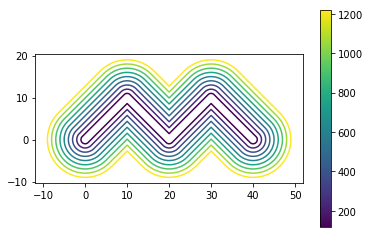

In [16]:
df.plot("a", legend=True)

In [17]:
shiftChevron = lambda d: shapely.ops.transform(lambda x,y: (x,y+d), l)

In [18]:
df = gpd.GeoDataFrame([[l.buffer(x).area, shiftChevron(15*x).buffer(x)] 
                       for x in range(1,10)], 
                      columns=["a","geometry"])

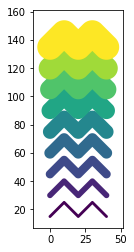

In [19]:
df.plot("a")

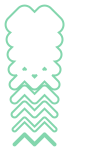

In [20]:
shapely.ops.unary_union(df.geometry).boundary

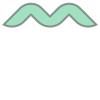

In [21]:
df.iloc[-1].geometry.intersection(df.iloc[-2].geometry)

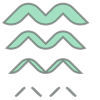

In [22]:
theIntersection = shapely.ops.unary_union([
                        df.iloc[i].geometry
                          .intersection(df.iloc[i+1].geometry) 
                        for i in range(df.shape[0]-1)])
theIntersection

In [23]:
len(list(theIntersection.geoms))

7